In [ ]:
import tensorflow as tf

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler

from datetime import datetime

import sys
sys.path.append("../")

from model_utility import * 
from utility import * 

In [ ]:
print(tf.__version__)
print(tf.config.list_physical_devices('GPU'))

2.9.2
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [ ]:
LOOKBACK = 61
TRAIN_SPLIT_RATIO = 0.9
columns = [CLOSE_INDEX]

LAST_MONTH_NUM_RECORDS = 2880

In [ ]:
todays_date = datetime.now().strftime('%Y-%m-%d')
download_monthly_klines('spot', [BTC], ['15m'], '2019-01-01', todays_date, 'train')

Found 1 symbols
[1/1] - start download monthly BTCUSDT klines 

file already exists! /content/train/BTCUSDT/BTCUSDT-15m-2019-01.zip

file already exists! /content/train/BTCUSDT/BTCUSDT-15m-2019-02.zip

file already exists! /content/train/BTCUSDT/BTCUSDT-15m-2019-03.zip

file already exists! /content/train/BTCUSDT/BTCUSDT-15m-2019-04.zip

file already exists! /content/train/BTCUSDT/BTCUSDT-15m-2019-05.zip

file already exists! /content/train/BTCUSDT/BTCUSDT-15m-2019-06.zip

file already exists! /content/train/BTCUSDT/BTCUSDT-15m-2019-07.zip

file already exists! /content/train/BTCUSDT/BTCUSDT-15m-2019-08.zip

file already exists! /content/train/BTCUSDT/BTCUSDT-15m-2019-09.zip

file already exists! /content/train/BTCUSDT/BTCUSDT-15m-2019-10.zip

file already exists! /content/train/BTCUSDT/BTCUSDT-15m-2019-11.zip

file already exists! /content/train/BTCUSDT/BTCUSDT-15m-2019-12.zip

file already exists! /content/train/BTCUSDT/BTCUSDT-15m-2020-01.zip

file already exists! /content/train/BTC

In [ ]:
dataframe = get_data('train', BTC)

train/BTCUSDT/BTCUSDT-15m-2019-01.csv
train/BTCUSDT/BTCUSDT-15m-2019-02.csv
train/BTCUSDT/BTCUSDT-15m-2019-03.csv
train/BTCUSDT/BTCUSDT-15m-2019-04.csv
train/BTCUSDT/BTCUSDT-15m-2019-05.csv
train/BTCUSDT/BTCUSDT-15m-2019-06.csv
train/BTCUSDT/BTCUSDT-15m-2019-07.csv
train/BTCUSDT/BTCUSDT-15m-2019-08.csv
train/BTCUSDT/BTCUSDT-15m-2019-09.csv
train/BTCUSDT/BTCUSDT-15m-2019-10.csv
train/BTCUSDT/BTCUSDT-15m-2019-11.csv
train/BTCUSDT/BTCUSDT-15m-2019-12.csv
train/BTCUSDT/BTCUSDT-15m-2020-01.csv
train/BTCUSDT/BTCUSDT-15m-2020-02.csv
train/BTCUSDT/BTCUSDT-15m-2020-03.csv
train/BTCUSDT/BTCUSDT-15m-2020-04.csv
train/BTCUSDT/BTCUSDT-15m-2020-05.csv
train/BTCUSDT/BTCUSDT-15m-2020-06.csv
train/BTCUSDT/BTCUSDT-15m-2020-07.csv
train/BTCUSDT/BTCUSDT-15m-2020-08.csv
train/BTCUSDT/BTCUSDT-15m-2020-09.csv
train/BTCUSDT/BTCUSDT-15m-2020-10.csv
train/BTCUSDT/BTCUSDT-15m-2020-11.csv
train/BTCUSDT/BTCUSDT-15m-2020-12.csv
train/BTCUSDT/BTCUSDT-15m-2021-01.csv
train/BTCUSDT/BTCUSDT-15m-2021-02.csv
train/BTCUSD

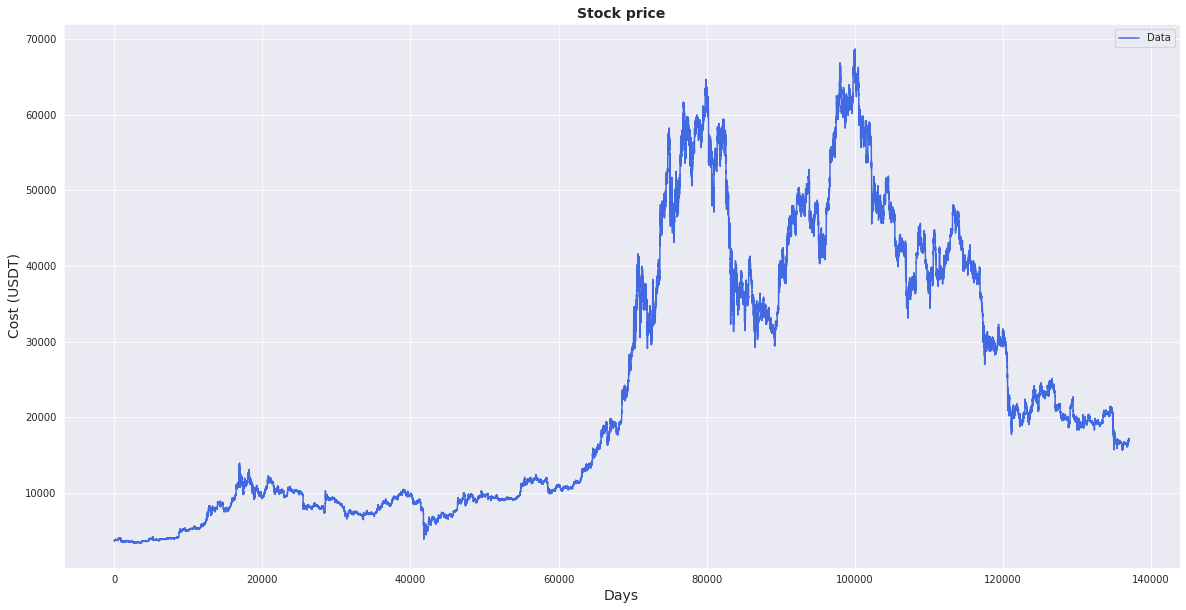

In [ ]:
dataframe = dataframe[dataframe[IGNORE_INDEX] == 0]
plot_graph(pd.DataFrame(dataframe[CLOSE_INDEX].values))

In [ ]:
scalers = {}
for col in columns:
    scaler = MinMaxScaler().fit(dataframe[[col]])
    dataframe[col] = scaler.transform(dataframe[[col]])
    scalers[col] = scaler

dataframe = dataframe[columns]

In [ ]:
x_train, y_train, x_test, y_test = split_data(dataframe, LOOKBACK, TRAIN_SPLIT_RATIO, CLOSE_INDEX-4)

print('x_train.shape = {}'.format(x_train.shape))
print('y_train.shape = {}'.format(y_train.shape))
print('x_test.shape = {}'.format(x_test.shape))
print('y_test.shape = {}'.format(y_test.shape))

x_train.shape = (123260, 60, 1)
y_train.shape = (123260,)
x_test.shape = (13695, 60, 1)
y_test.shape = (13695,)


In [ ]:
x_train = tf.convert_to_tensor(x_train, dtype=tf.float32)
x_test = tf.convert_to_tensor(x_test, dtype=tf.float32)
y_train = tf.convert_to_tensor(y_train, dtype=tf.float32)
y_test = tf.convert_to_tensor(y_test, dtype=tf.float32)

In [ ]:
input_dim = x_train.shape[1]
n_features = x_train.shape[2]
output_dim = 1

In [ ]:
lstm_model1 = tf.keras.Sequential()

lstm_model1.add(tf.keras.layers.LSTM(256, input_shape=(input_dim, n_features)))
lstm_model1.add(tf.keras.layers.Dense(1))

lstm_model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 256)               264192    
                                                                 
 dense (Dense)               (None, 1)                 257       
                                                                 
Total params: 264,449
Trainable params: 264,449
Non-trainable params: 0
_________________________________________________________________


In [ ]:
lstm_model1.compile(loss=tf.keras.losses.MeanAbsoluteError(),
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                 metrics=[tf.keras.metrics.RootMeanSquaredError()])

In [ ]:
hist1 = lstm_model1.fit(x_train, y_train, epochs=20)

Epoch 1/20
3852/3852 [==============================] - 28s 6ms/step - loss: 0.0040 - root_mean_squared_error: 0.0124
Epoch 2/20
3852/3852 [==============================] - 23s 6ms/step - loss: 0.0022 - root_mean_squared_error: 0.0035
Epoch 3/20
3852/3852 [==============================] - 25s 6ms/step - loss: 0.0019 - root_mean_squared_error: 0.0030
Epoch 4/20
3852/3852 [==============================] - 23s 6ms/step - loss: 0.0018 - root_mean_squared_error: 0.0028
Epoch 5/20
3852/3852 [==============================] - 23s 6ms/step - loss: 0.0016 - root_mean_squared_error: 0.0026
Epoch 6/20
3852/3852 [==============================] - 23s 6ms/step - loss: 0.0016 - root_mean_squared_error: 0.0026
Epoch 7/20
3852/3852 [==============================] - 23s 6ms/step - loss: 0.0015 - root_mean_squared_error: 0.0025
Epoch 8/20
3852/3852 [==============================] - 23s 6ms/step - loss: 0.0015 - root_mean_squared_error: 0.0024
Epoch 9/20
3852/3852 [==============================] - 

In [ ]:
lstm_model1.evaluate(x_test, y_test)

428/428 [==============================] - 2s 4ms/step - loss: 7.5696e-04 - root_mean_squared_error: 0.0011


[0.0007569621666334569, 0.0010795866837725043]

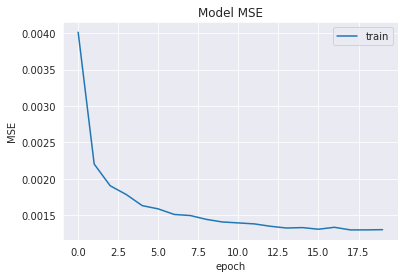

In [ ]:
plt.plot(hist1.history['loss'])
plt.title('Model MSE')
plt.ylabel('MSE')
plt.xlabel('epoch')
plt.legend(['train'])
plt.show()

In [ ]:
y_train_pred = lstm_model1.predict(x_train)

3852/3852 [==============================] - 11s 3ms/step


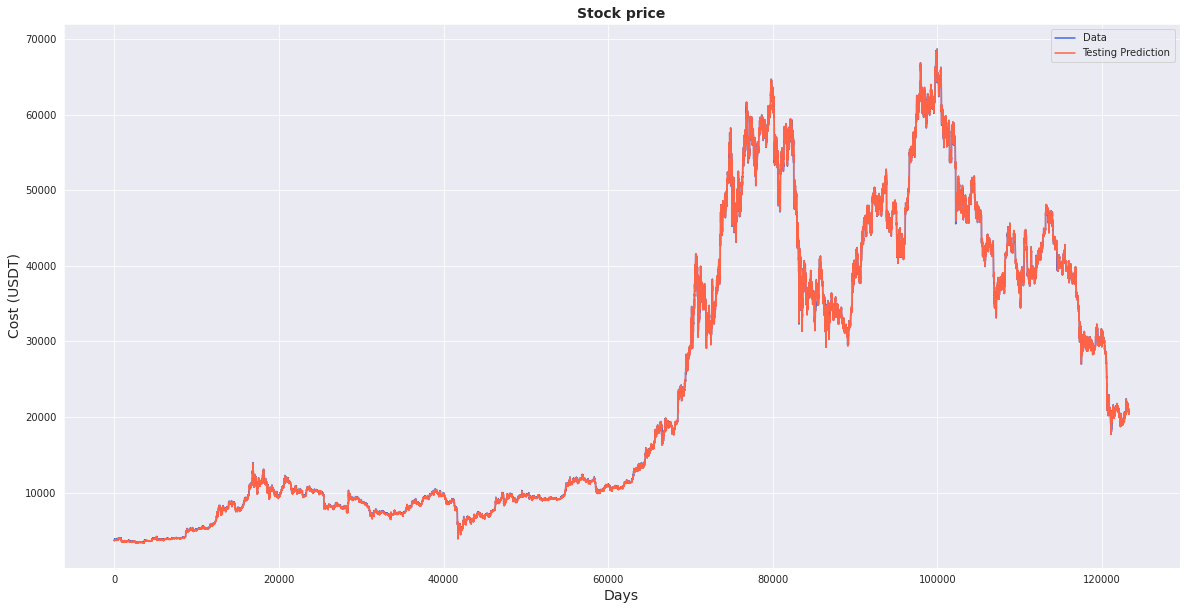

In [ ]:
plot_graph(pd.DataFrame(scalers[CLOSE_INDEX].inverse_transform(y_train.numpy().reshape(-1, 1))), 
           pd.DataFrame(scalers[CLOSE_INDEX].inverse_transform(y_train_pred.reshape(-1, 1))))

In [ ]:
y_test_pred = lstm_model1.predict(x_test)

428/428 [==============================] - 1s 3ms/step


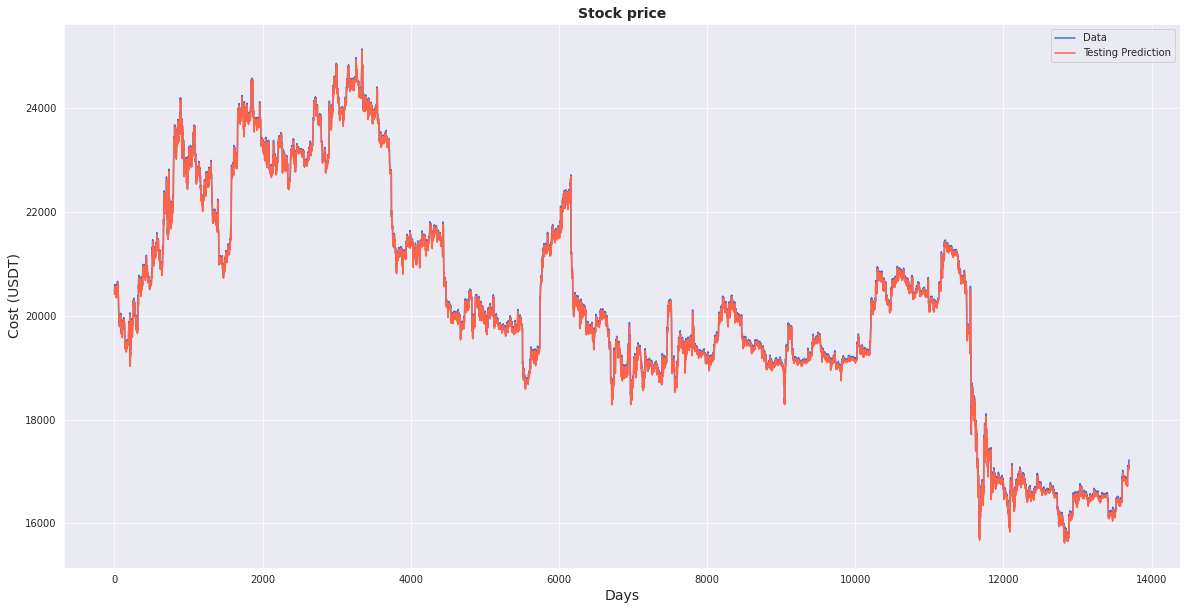

In [ ]:
plot_graph(pd.DataFrame(scalers[CLOSE_INDEX].inverse_transform(y_test.numpy().reshape(-1, 1))), 
           pd.DataFrame(scalers[CLOSE_INDEX].inverse_transform(y_test_pred.reshape(-1, 1))))

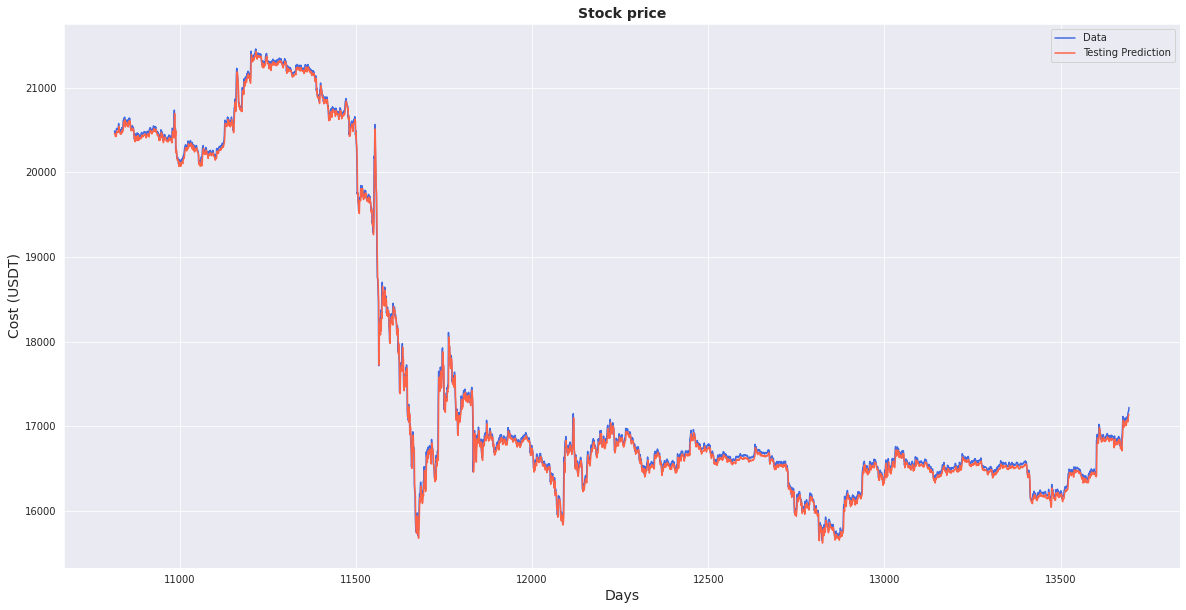

In [ ]:
plot_graph(pd.DataFrame(scalers[CLOSE_INDEX].inverse_transform(y_test.numpy().reshape(-1, 1)))[-LAST_MONTH_NUM_RECORDS:], 
           pd.DataFrame(scalers[CLOSE_INDEX].inverse_transform(y_test_pred.reshape(-1, 1)))[-LAST_MONTH_NUM_RECORDS:])

In [ ]:
lstm_model2 = tf.keras.Sequential()

lstm_model2.add(tf.keras.layers.LSTM(128 , return_sequences = True , input_shape=(input_dim, n_features)))
lstm_model2.add(tf.keras.layers.LSTM(128,  return_sequences = True ))
lstm_model2.add(tf.keras.layers.LSTM(128))

lstm_model2.add(tf.keras.layers.Dense(1))

lstm_model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 60, 128)           66560     
                                                                 
 lstm_2 (LSTM)               (None, 60, 128)           131584    
                                                                 
 lstm_3 (LSTM)               (None, 128)               131584    
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 329,857
Trainable params: 329,857
Non-trainable params: 0
_________________________________________________________________


In [ ]:
lstm_model2.compile(loss=tf.keras.losses.MeanAbsoluteError(),
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                 metrics=[tf.keras.metrics.RootMeanSquaredError()])

In [ ]:
hist2 = lstm_model2.fit(x_train, y_train, epochs=20)

Epoch 1/20
3852/3852 [==============================] - 58s 14ms/step - loss: 0.0063 - root_mean_squared_error: 0.0134
Epoch 2/20
3852/3852 [==============================] - 49s 13ms/step - loss: 0.0038 - root_mean_squared_error: 0.0059
Epoch 3/20
3852/3852 [==============================] - 49s 13ms/step - loss: 0.0031 - root_mean_squared_error: 0.0047
Epoch 4/20
3852/3852 [==============================] - 48s 12ms/step - loss: 0.0028 - root_mean_squared_error: 0.0044
Epoch 5/20
3852/3852 [==============================] - 48s 13ms/step - loss: 0.0026 - root_mean_squared_error: 0.0039
Epoch 6/20
3852/3852 [==============================] - 48s 12ms/step - loss: 0.0024 - root_mean_squared_error: 0.0036
Epoch 7/20
3852/3852 [==============================] - 48s 13ms/step - loss: 0.0022 - root_mean_squared_error: 0.0033
Epoch 8/20
3852/3852 [==============================] - 49s 13ms/step - loss: 0.0020 - root_mean_squared_error: 0.0031
Epoch 9/20
3852/3852 [==========================

In [ ]:
lstm_model2.evaluate(x_test, y_test)

428/428 [==============================] - 4s 6ms/step - loss: 0.0012 - root_mean_squared_error: 0.0014


[0.0011854282347485423, 0.0014417502097785473]

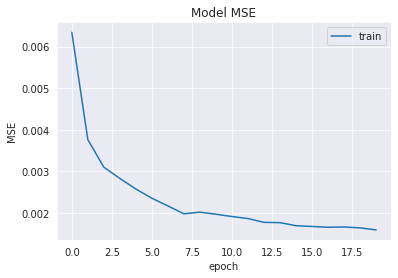

In [ ]:
plt.plot(hist2.history['loss'])
plt.title('Model MSE')
plt.ylabel('MSE')
plt.xlabel('epoch')
plt.legend(['train'])
plt.show()

In [ ]:
y_train_pred = lstm_model2.predict(x_train)

3852/3852 [==============================] - 22s 5ms/step


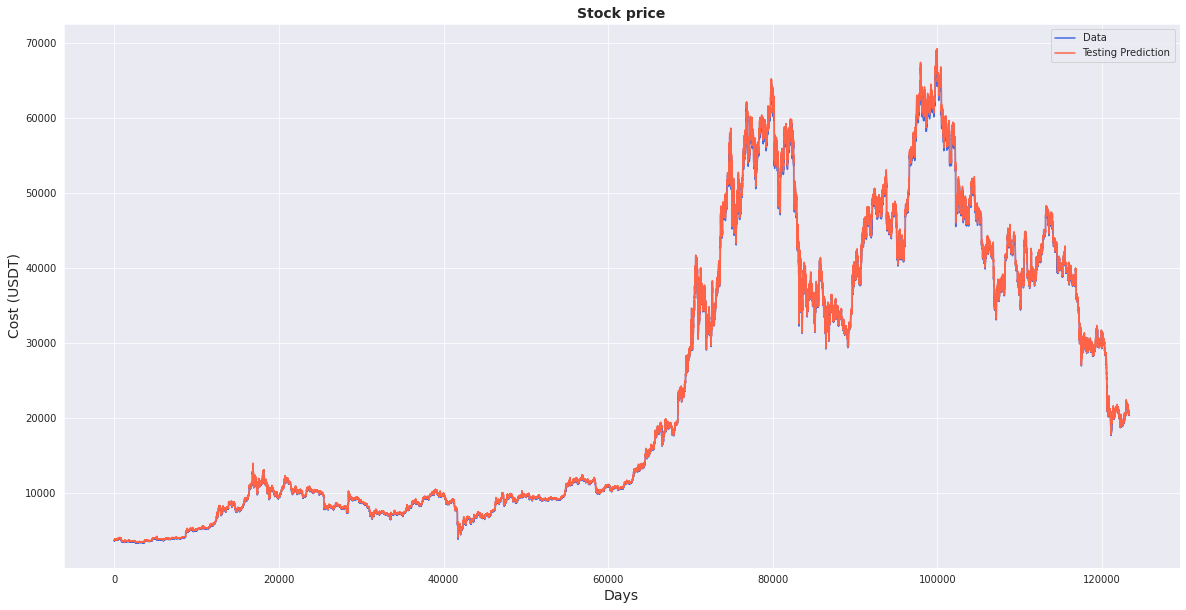

In [ ]:
plot_graph(pd.DataFrame(scalers[CLOSE_INDEX].inverse_transform(y_train.numpy().reshape(-1, 1))), 
           pd.DataFrame(scalers[CLOSE_INDEX].inverse_transform(y_train_pred.reshape(-1, 1))))

In [ ]:
y_test_pred = lstm_model2.predict(x_test)

428/428 [==============================] - 2s 6ms/step


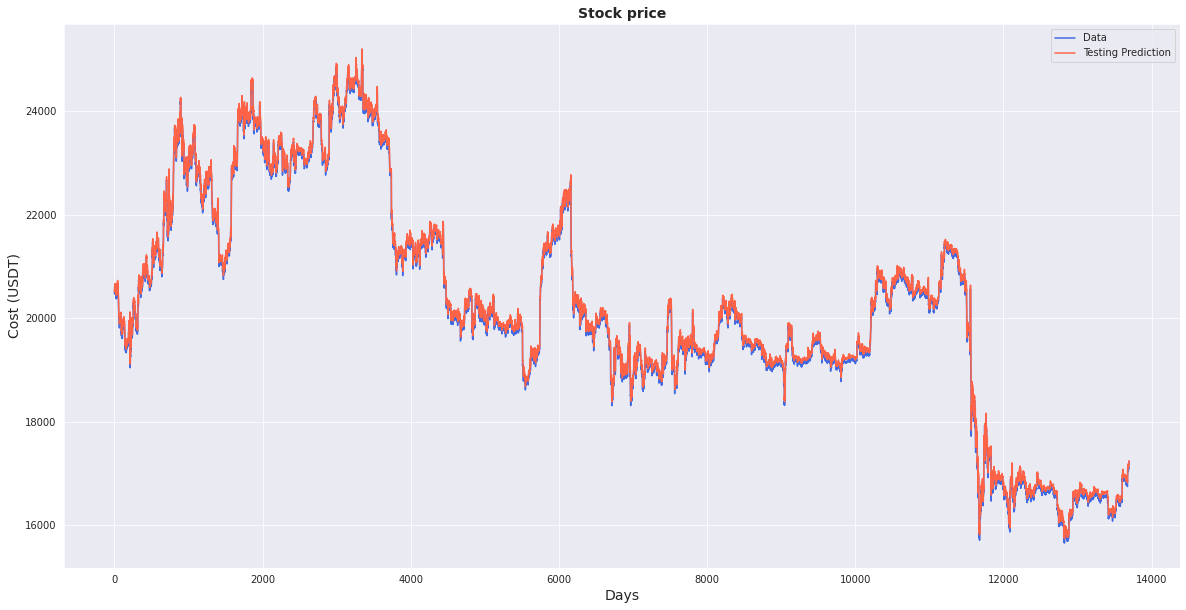

In [ ]:
plot_graph(pd.DataFrame(scalers[CLOSE_INDEX].inverse_transform(y_test.numpy().reshape(-1, 1))), 
           pd.DataFrame(scalers[CLOSE_INDEX].inverse_transform(y_test_pred.reshape(-1, 1))))

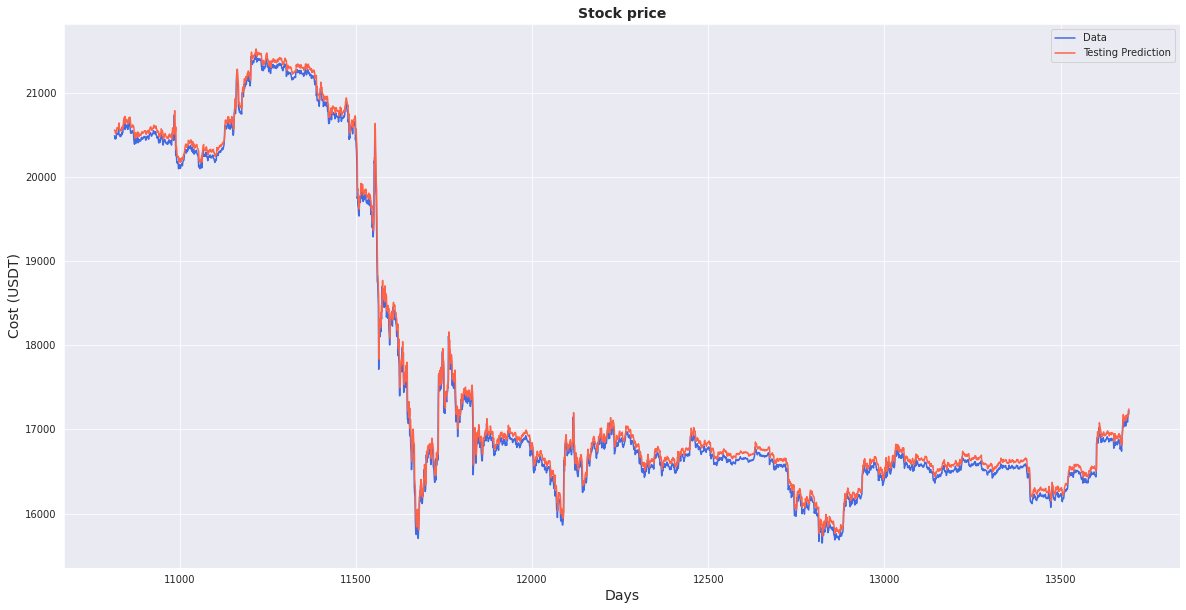

In [ ]:
plot_graph(pd.DataFrame(scalers[CLOSE_INDEX].inverse_transform(y_test.numpy().reshape(-1, 1)))[-LAST_MONTH_NUM_RECORDS:], 
           pd.DataFrame(scalers[CLOSE_INDEX].inverse_transform(y_test_pred.reshape(-1, 1)))[-LAST_MONTH_NUM_RECORDS:])

In [ ]:
lstm_model3 = tf.keras.Sequential()

lstm_model3.add(tf.keras.layers.LSTM(64 , return_sequences = True , input_shape=(input_dim, n_features)))
lstm_model3.add(tf.keras.layers.LSTM(64 ,  return_sequences = True ))
lstm_model3.add(tf.keras.layers.LSTM(64 ,  return_sequences = True ))
lstm_model3.add(tf.keras.layers.LSTM(64 ,  return_sequences = True ))
lstm_model3.add(tf.keras.layers.LSTM(64))

lstm_model3.add(tf.keras.layers.Dense(1))

lstm_model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 60, 64)            16896     
                                                                 
 lstm_5 (LSTM)               (None, 60, 64)            33024     
                                                                 
 lstm_6 (LSTM)               (None, 60, 64)            33024     
                                                                 
 lstm_7 (LSTM)               (None, 60, 64)            33024     
                                                                 
 lstm_8 (LSTM)               (None, 64)                33024     
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 149,057
Trainable params: 149,057
Non-tr

In [ ]:
lstm_model3.compile(loss=tf.keras.losses.MeanAbsoluteError(),
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                 metrics=[tf.keras.metrics.RootMeanSquaredError()])

In [ ]:
hist3 = lstm_model3.fit(x_train, y_train, epochs=20)

Epoch 1/20
3852/3852 [==============================] - 65s 15ms/step - loss: 0.0083 - root_mean_squared_error: 0.0169
Epoch 2/20
3852/3852 [==============================] - 59s 15ms/step - loss: 0.0047 - root_mean_squared_error: 0.0073
Epoch 3/20
3852/3852 [==============================] - 59s 15ms/step - loss: 0.0038 - root_mean_squared_error: 0.0058
Epoch 4/20
3852/3852 [==============================] - 59s 15ms/step - loss: 0.0031 - root_mean_squared_error: 0.0047
Epoch 5/20
3852/3852 [==============================] - 59s 15ms/step - loss: 0.0029 - root_mean_squared_error: 0.0044
Epoch 6/20
3852/3852 [==============================] - 59s 15ms/step - loss: 0.0025 - root_mean_squared_error: 0.0038
Epoch 7/20
3852/3852 [==============================] - 58s 15ms/step - loss: 0.0025 - root_mean_squared_error: 0.0037
Epoch 8/20
3852/3852 [==============================] - 59s 15ms/step - loss: 0.0023 - root_mean_squared_error: 0.0035
Epoch 9/20
3852/3852 [==========================

In [ ]:
lstm_model3.evaluate(x_test, y_test)

428/428 [==============================] - 5s 8ms/step - loss: 0.0017 - root_mean_squared_error: 0.0019


[0.0016536250477656722, 0.0018506128108128905]

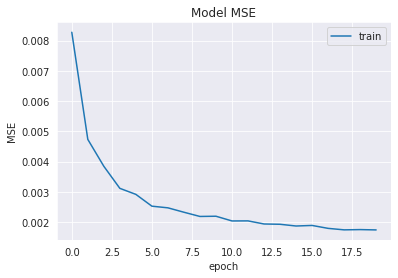

In [ ]:
plt.plot(hist3.history['loss'])
plt.title('Model MSE')
plt.ylabel('MSE')
plt.xlabel('epoch')
plt.legend(['train'])
plt.show()

In [ ]:
y_train_pred = lstm_model3.predict(x_train)

3852/3852 [==============================] - 28s 7ms/step


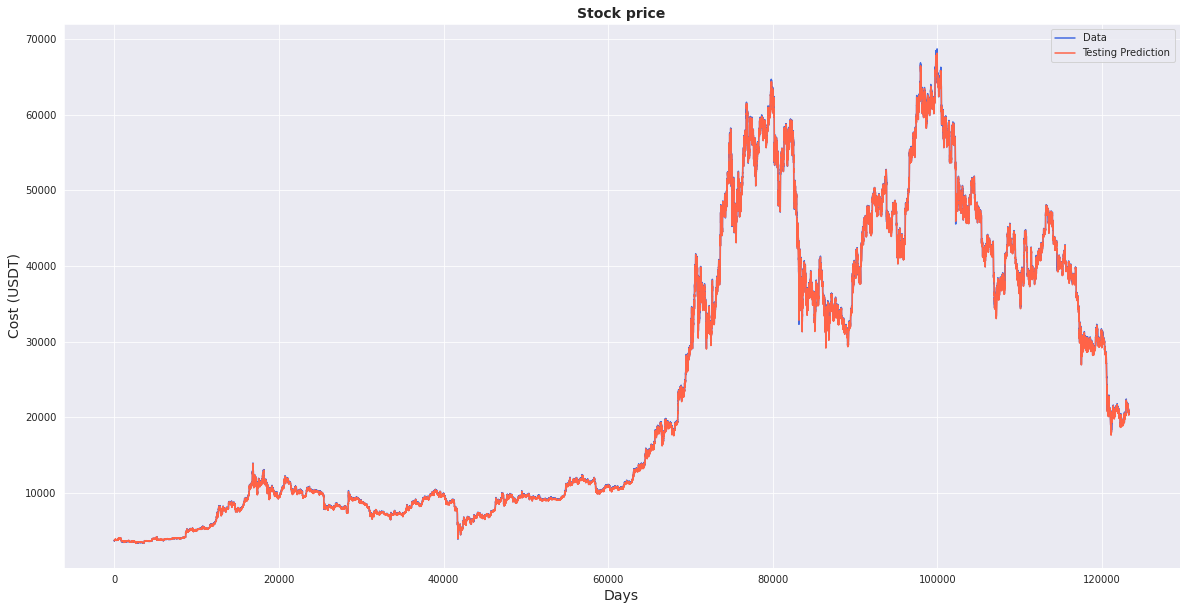

In [ ]:
plot_graph(pd.DataFrame(scalers[CLOSE_INDEX].inverse_transform(y_train.numpy().reshape(-1, 1))), 
           pd.DataFrame(scalers[CLOSE_INDEX].inverse_transform(y_train_pred.reshape(-1, 1))))

In [ ]:
y_test_pred = lstm_model3.predict(x_test)

428/428 [==============================] - 3s 7ms/step


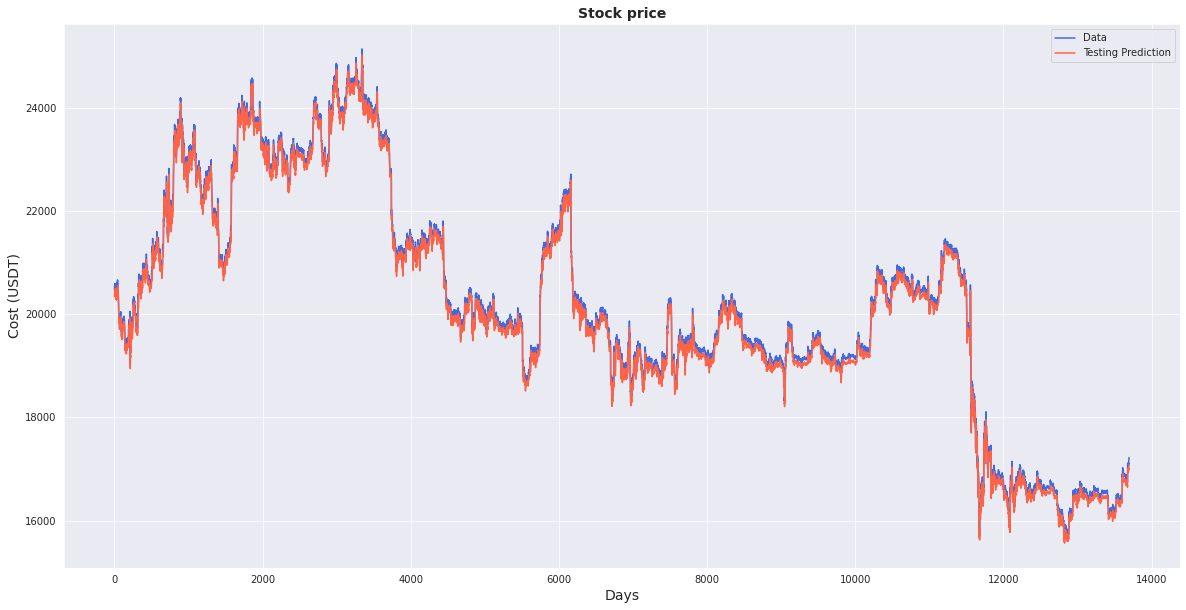

In [ ]:
plot_graph(pd.DataFrame(scalers[CLOSE_INDEX].inverse_transform(y_test.numpy().reshape(-1, 1))), 
           pd.DataFrame(scalers[CLOSE_INDEX].inverse_transform(y_test_pred.reshape(-1, 1))))

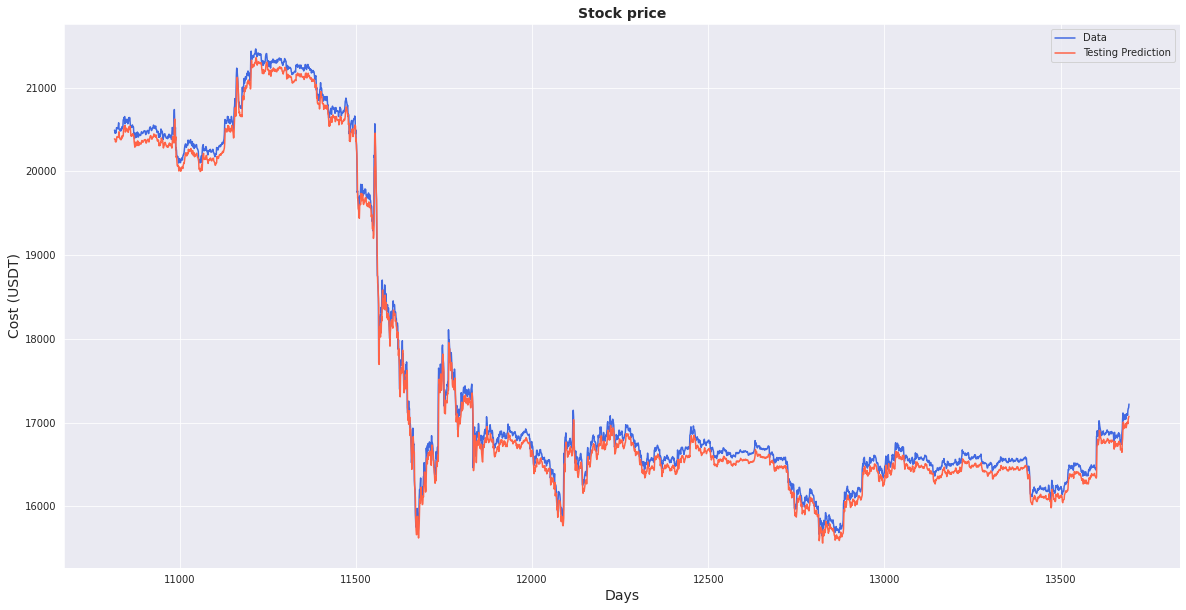

In [ ]:
plot_graph(pd.DataFrame(scalers[CLOSE_INDEX].inverse_transform(y_test.numpy().reshape(-1, 1)))[-LAST_MONTH_NUM_RECORDS:], 
           pd.DataFrame(scalers[CLOSE_INDEX].inverse_transform(y_test_pred.reshape(-1, 1)))[-LAST_MONTH_NUM_RECORDS:])